# LIBRARIES IMPORT

In [3]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")
#for controlling and aotumating The web page
from selenium import webdriver
#to locate elmenets as a web page (eg.. by ID,name,Xpath)
from selenium.webdriver.common.by import By
#to wait for certain conditions before proceeding(explicit wait)
from selenium.webdriver.support.ui import WebDriverWait
#To define conditions to wait for (like visibility of an elements)
from selenium.webdriver.support import expected_conditions as EC
#To manage the chrome driver service
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
#Automatically handles downloading and setting up chromedriver
from webdriver_manager.chrome import ChromeDriverManager
#For aprsing HTML and extraxting data from web page
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [4]:
service = Service(ChromeDriverManager().install())

In [5]:
driver = webdriver.Chrome(service = service)

In [6]:
url = "https://www.amazon.in/"

In [7]:
driver.get(url)

In [8]:
search_box = WebDriverWait(driver,10).until(
    EC.presence_of_element_located((By.CLASS_NAME, "nav-input")))

In [9]:
search_box.send_keys("shoes")

In [10]:
search_box.submit()

In [11]:
page_count = 20

#brands_list = ["Nike", "adidas", "Puma", "Reebok", "ASICS"]

Brands = []
Titles = []
Ratings = []
Prices = []

for page in range(page_count):
    print(f"Scraping page {page + 1}")
    time.sleep(2)

    soup = BeautifulSoup(driver.page_source, "html.parser")
    all_product = soup.find_all("div", class_="sg-col-inner")
    
    for products in all_product:
        brands = products.find("h2", class_ = "a-size-mini")
        titles = products.find("h2", class_ = "a-size-base-plus")
        ratings = products.find("span", class_ = "a-icon-alt")
        prices = products.find("span", class_ = "a-price-whole")
        
        '''
        if brands:
            brand_text = brands.get_text(strip=True)
            if brand_text in brands_list:
                Brands.append(brand_text)
            else:
                Brands.append(np.nan)
        '''
        if brands:
            Brands.append(brands.get_text(strip=True))
        else:
            Brands.append(np.nan)

        if titles:
            Titles.append(titles.get_text(strip=True))
        else:
            Titles.append(np.nan)
        if ratings:
            Ratings.append(ratings.get_text(strip=True))
        else:
            Ratings.append(np.nan)
        if prices:
            Prices.append(prices.get_text(strip=True))
        else:
            Prices.append(np.nan)

    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "a.s-pagination-next")
        next_button.click()
    except:
        print("No more pages or cannot click next.")
        break
    print("Completed")

Scraping page 1
Completed
Scraping page 2
Completed
Scraping page 3
Completed
Scraping page 4
Completed
Scraping page 5
Completed
Scraping page 6
Completed
Scraping page 7
No more pages or cannot click next.


In [12]:
df = pd.DataFrame({
    "Brands" : Brands,
    "Title": Titles,
    "Rating": Ratings,
    "Price": Prices
})

In [13]:
df

,Brands,Title,Rating,Price
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Columbia,Men Boot,4.5 out of 5 stars,660
...,...,...,...,...
563,NaN,NaN,NaN,NaN
564,NaN,NaN,NaN,NaN
565,NaN,NaN,NaN,NaN
566,NaN,NaN,NaN,NaN


In [14]:
df.dropna(inplace=True)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df

,Brands,Title,Rating,Price
4,Columbia,Men Boot,4.5 out of 5 stars,660
5,Columbia,Men Boot,4.5 out of 5 stars,"10,999"
6,Bacca Bucci,Men Lace Up Running Shoes,3.9 out of 5 stars,"1,499"
7,BRUTON,EVA Lite Sneakers,3.4 out of 5 stars,498
8,BRUTON,EVA Lite Sport Shoes Running Shoes for Men- White,3.6 out of 5 stars,495
...,...,...,...,...
547,SPARX,Mens Sm 9039 Sneaker,4.1 out of 5 stars,629
548,ASIAN,Boys Lace Up School Shoes,3.8 out of 5 stars,580
549,AVANT,Men's SpartanX Running Shoes - Superior Cushio...,4.0 out of 5 stars,999
552,DOCTOR EXTRA SOFT,Memory Foam Mens Running Shoe with EVA Sole | ...,4.0 out of 5 stars,998


In [17]:
df["Brands"].value_counts()

Brands
Campus               40
ASIAN                37
Bata                 32
SPARX                28
Puma                 26
adidas               21
Skechers             14
new balance          12
Liberty              12
BRUTON               12
Reebok               12
Bacca Bucci          10
Woodland             10
ATHCO                 7
JQR                   6
HEALTH FIT            5
Boldfit               4
Lancer                4
Centrino              4
AVANT                 4
OFF LIMITS            4
Nivia                 3
Red Chief             3
Shoetopia             2
DOCTOR EXTRA SOFT     2
GENERIC               2
Neeman's              2
Columbia              2
LANCER                2
Vector X              2
STANPHORD             1
DSC                   1
TRASE                 1
Karaddi               1
HEALTH SAFE           1
Lify                  1
AJANTA                1
Cruiser               1
Aivin                 1
Power                 1
Nike                  1
Kraasa   

In [18]:
#df.to_excel("shoes.xlsx",index=False)

# DATA CLEANING

In [20]:
df = pd.read_excel("shoes.xlsx")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brands  316 non-null    object 
 1   Title   316 non-null    object 
 2   Rating  316 non-null    object 
 3   Price   314 non-null    float64
dtypes: float64(1), object(3)
memory usage: 10.0+ KB


In [22]:
df[df["Price"].isnull()]

,Brands,Title,Rating,Price
129,Kraasa,ZONIC Menâ€™s Lightweight Knit Sneakers with M...,Previous page,NaN
196,SPARX,Mens Sm 9039 Sneaker,Previous page,NaN


In [23]:
df.dropna(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 0 to 315
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brands  314 non-null    object 
 1   Title   314 non-null    object 
 2   Rating  314 non-null    object 
 3   Price   314 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.3+ KB


In [25]:
df["Rating"].value_counts()

Rating
4.0 out of 5 stars     57
4.1 out of 5 stars     40
3.8 out of 5 stars     37
3.9 out of 5 stars     35
4.2 out of 5 stars     32
3.7 out of 5 stars     23
3.6 out of 5 stars     16
4.4 out of 5 stars     10
3.5 out of 5 stars      9
4.3 out of 5 stars      8
4.5 out of 5 stars      7
3.4 out of 5 stars      6
5.0 out of 5 stars      6
3.0 out of 5 stars      5
3.3 out of 5 stars      3
3.2 out of 5 stars      3
4.7 out of 5 stars      3
4.6 out of 5 stars      3
4.8 out of 5 stars      2
4.9 out of 5 stars      2
1.0 out of 5 stars      2
2.5 out of 5 stars      1
2.4 out of 5 stars      1
2.7 out of 5 stars      1
3.1 out of 5 stars      1
4.2 out of 5 stars.     1
Name: count, dtype: int64

In [26]:
df["Rating"] = df["Rating"].astype(str).str.slice(0, 3)
df["Rating"] = df["Rating"].astype(float)

In [27]:
df.drop_duplicates("Title",inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 315
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brands  270 non-null    object 
 1   Title   270 non-null    object 
 2   Rating  270 non-null    float64
 3   Price   270 non-null    float64
dtypes: float64(2), object(2)
memory usage: 10.5+ KB


In [29]:
df.head()

,Brands,Title,Rating,Price
0,Reebok,Mens Baseliner Sneaker,3.9,1399.0
2,Reebok,Mens Evander Running Shoe,3.9,1884.0
3,Reebok,Mens Emergo Runner LpRunning Shoes,4.0,3299.0
4,BRUTON,EVA Lite Sneakers,3.4,498.0
5,ASIAN,Men's MEXICO-11 Casual Sneaker Shoes with Synt...,3.5,799.0


In [30]:
df = df.rename(columns={
    "Rating" : "Rating(out of 5)"
})

# EDA

In [32]:
def categorize_title(title):
    title = str(title).lower()
    if "running" in title:
        return "Running Shoes"
    elif "sneaker" in title:
        return "Sneakers"
    elif "walking" in title:
        return "Walking Shoes"
    elif "casual" in title:
        return "Casual Shoes"
    elif "boot" in title:
        return "Boots"
    elif "slipper" in title:
        return "Slippers"
    else:
        return "Other"

df["Category"] = df["Title"].apply(categorize_title)

In [33]:
df["Category"].value_counts()

Category
Running Shoes    112
Sneakers          90
Other             35
Walking Shoes     22
Casual Shoes      11
Name: count, dtype: int64

## VISUALIZATION

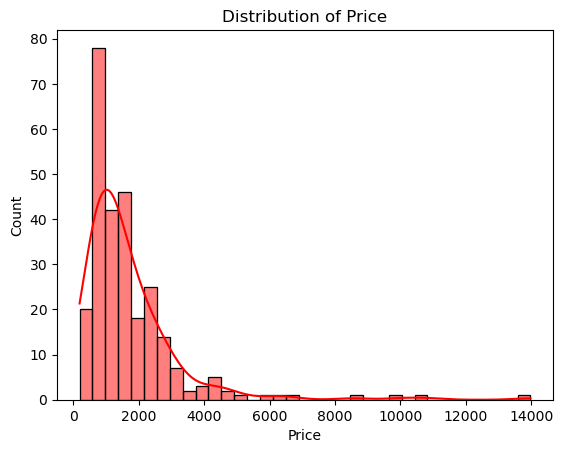

In [35]:
sns.histplot(x=df["Price"],kde=True,color="red")
plt.title("Distribution of Price")
plt.show()

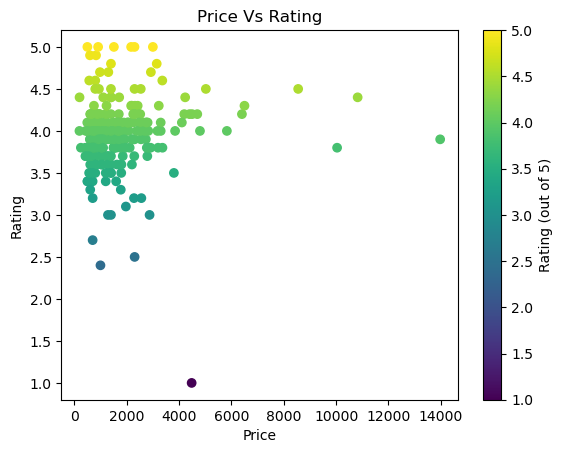

In [36]:
plt.scatter(x=df["Price"],y=df["Rating(out of 5)"],c=df["Rating(out of 5)"],cmap='viridis')
plt.colorbar(label="Rating (out of 5)")
plt.title("Price Vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

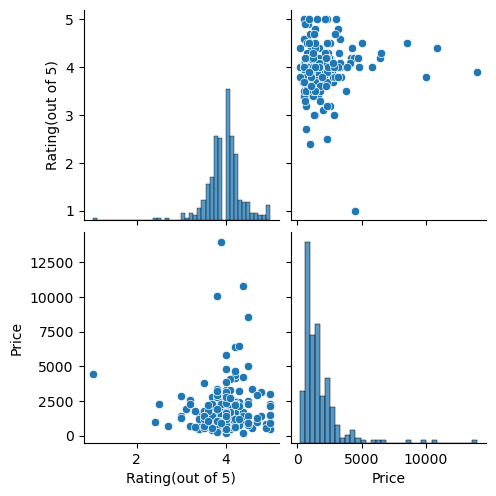

In [37]:
sns.pairplot(df)
plt.show()

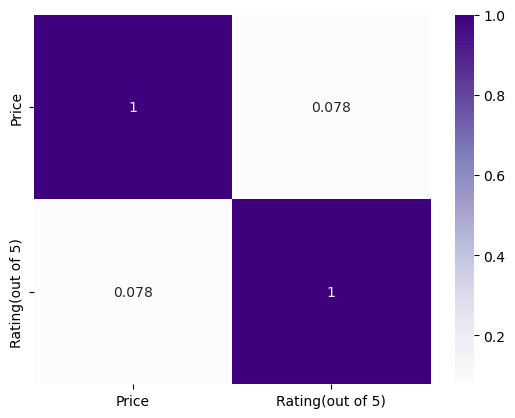

In [38]:
Data = df[["Price","Rating(out of 5)"]].corr()
sns.heatmap(data=Data,annot=True,cmap='Purples')
plt.show()

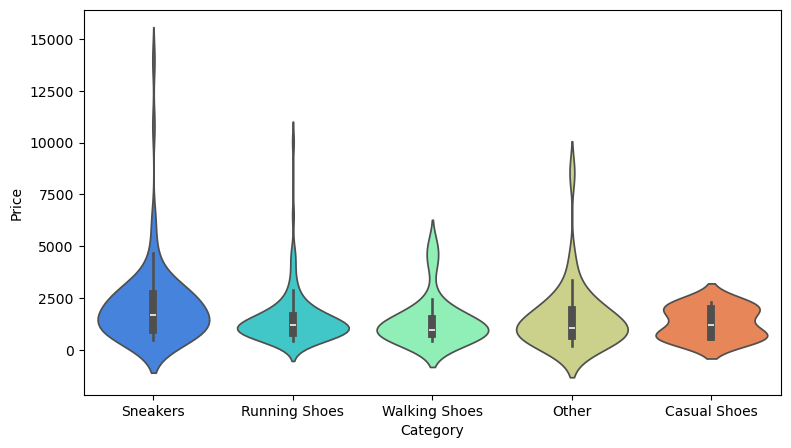

In [39]:
plt.figure(figsize=(9,5))
sns.violinplot(data=df,x="Category",y="Price",palette="rainbow")
plt.show()

# UNSUPERVISED LEARNING

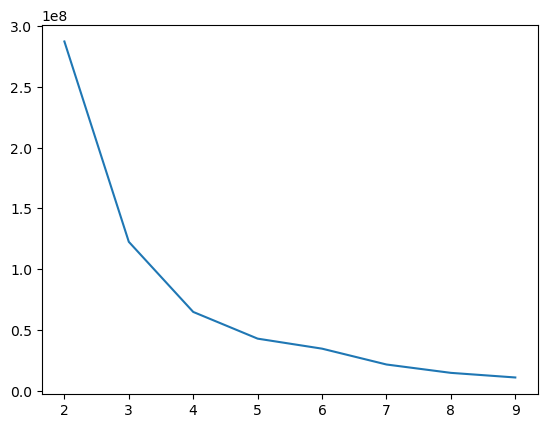

In [41]:
#ELBOW
X = df[["Price", "Rating(out of 5)"]]
kr = range(2,10)
elbow=[]

for k in kr:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    elbow.append(km.inertia_)

plt.plot(kr,elbow)
plt.show()

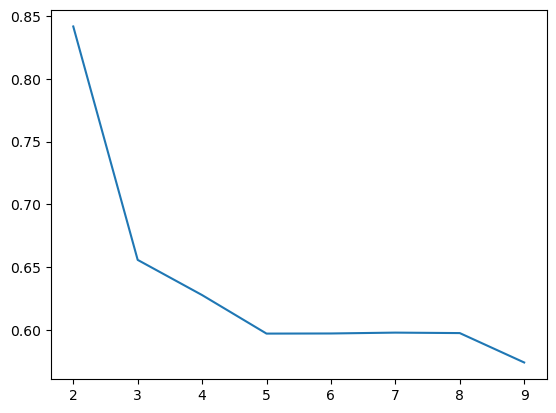

K=3 and it's silhout score is : 0.6556941432766736


In [42]:
#silhouette_score
kr = range(2,10)
silhout=[]

for k in kr:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    silhout.append(silhouette_score(X,km.labels_))

plt.plot(kr,silhout)
plt.show()
print(f"K=3 and it's silhout score is : {silhout[1]}")

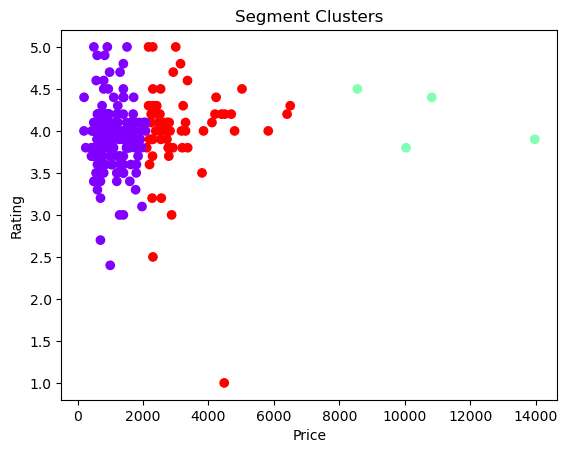

In [43]:
X = df[["Price", "Rating(out of 5)"]]

kmeans = KMeans(n_clusters=3,n_init=10,random_state=42)
df["Segment"] = kmeans.fit_predict(X)

plt.scatter(df["Price"], df["Rating(out of 5)"], c=df["Segment"], cmap='rainbow')
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Segment Clusters")
plt.show()

In [44]:
df

,Brands,Title,Rating(out of 5),Price,Category,Segment
0,Reebok,Mens Baseliner Sneaker,3.9,1399.0,Sneakers,0
2,Reebok,Mens Evander Running Shoe,3.9,1884.0,Running Shoes,0
3,Reebok,Mens Emergo Runner LpRunning Shoes,4.0,3299.0,Running Shoes,2
4,BRUTON,EVA Lite Sneakers,3.4,498.0,Sneakers,0
5,ASIAN,Men's MEXICO-11 Casual Sneaker Shoes with Synt...,3.5,799.0,Sneakers,0
...,...,...,...,...,...,...
310,Columbus,Maverick Sports Shoes - Running Shoes|Walking ...,4.0,1399.0,Running Shoes,0
311,Columbus,Eagle Sports Shoe - Running Shoe| Walking Shoe...,3.0,1285.0,Running Shoes,0
313,GO RIDE,"East Running Shoes for Men, Running Shoes for ...",3.8,1042.0,Running Shoes,0
314,GO RIDE,"Focus Sports Running Shoes for Men, Running Sh...",3.9,932.0,Running Shoes,0


In [45]:
df["Segment"].value_counts()

Segment
0    203
2     63
1      4
Name: count, dtype: int64

In [46]:
df["Segment"] = df["Segment"].map({0 : "Low_segment",1 : "Premium_segment", 2 : "Medium_segment"})

In [47]:
df.columns

Index(['Brands', 'Title', 'Rating(out of 5)', 'Price', 'Category', 'Segment'], dtype='object')

In [48]:
df.to_excel("data_for_sql.xlsx",index=False)

# SUPERVISED LEARNING

In [50]:
X = df[['Rating(out of 5)', 'Price', 'Category']]
y = df["Segment"]

In [51]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False)
y_encode = LabelEncoder()
smote = SMOTE(k_neighbors=2,random_state=42)

In [52]:
X_cat = encoder.fit_transform(X[["Category"]])
X_val = scaler.fit_transform(X[['Rating(out of 5)', 'Price']])
X = np.hstack([X_cat,X_val])

In [53]:
y_encoded = y_encode.fit_transform(y)

In [54]:
X_train,x_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.20,random_state=60,stratify=y)

In [55]:
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

### Imbalanced Y class

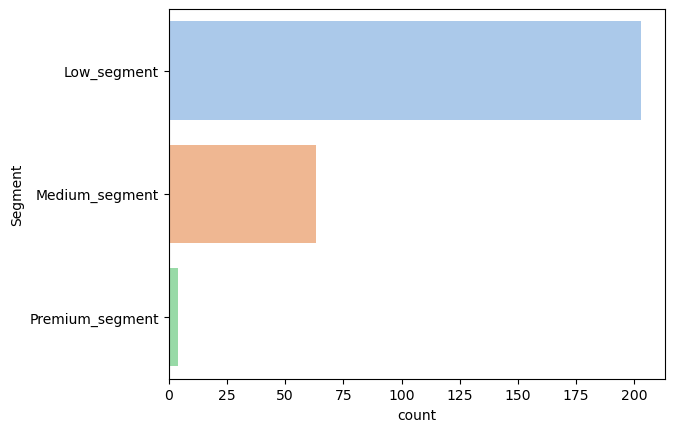

In [57]:
sns.countplot(df["Segment"],palette="pastel")
plt.show()

### Balanced Y class After SMOTE

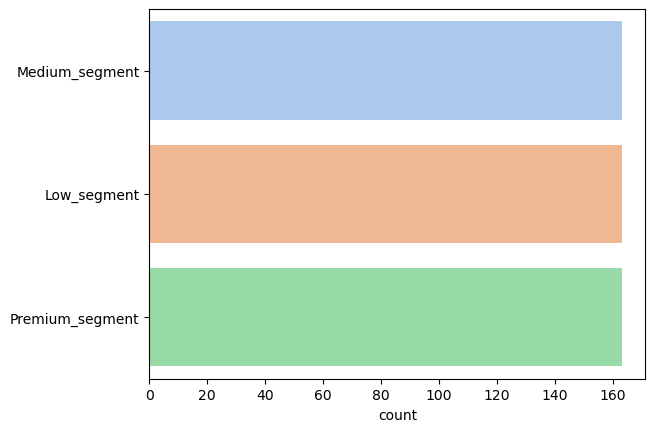

In [59]:
sns.countplot(y_encode.inverse_transform(y_train_resampled),palette="pastel")
plt.show()

## Logistic Regression

### Base Model

In [62]:
lr_model = LogisticRegression()

In [63]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred_test = lr_model.predict(x_test)

In [65]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         1

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



In [66]:
acc_score_test = accuracy_score(y_test, y_pred_test)
print(f"Logistic Accuracy Score Test : {acc_score_test:.2f}")

f1_test = f1_score(y_test, y_pred_test, average='weighted')
print(f"Logistic F1 Score Test : {f1_test:.2f}")

Logistic Accuracy Score Test : 0.96
Logistic F1 Score Test : 0.96


In [67]:
y_pred_train = lr_model.predict(X_train)

In [68]:
acc_score_train = accuracy_score(y_train, y_pred_train)
print(f"Logistic Accuracy Score Train : {acc_score_train:.2f}")

f1_train = f1_score(y_train, y_pred_train, average='weighted')
print(f"Logistic F1 Score Train : {f1_train:.2f}")

Logistic Accuracy Score Train : 0.98
Logistic F1 Score Train : 0.98


### Base Model With Parameter

In [70]:
param_grids_lr = {
    'C' : np.logspace(0,10, 100),
    'penalty' : ['l1','l2'],
    'solver' : ['liblinear'],
}

In [71]:
random_lr = RandomizedSearchCV(lr_model,param_grids_lr,cv=5,scoring="accuracy",verbose=3)
random_lr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=3944206059.437648, penalty=l2, solver=liblinear;, score=0.977 total time=   0.0s
[CV 2/5] END C=3944206059.437648, penalty=l2, solver=liblinear;, score=0.953 total time=   0.0s
[CV 3/5] END C=3944206059.437648, penalty=l2, solver=liblinear;, score=0.977 total time=   0.0s
[CV 4/5] END C=3944206059.437648, penalty=l2, solver=liblinear;, score=0.977 total time=   0.0s
[CV 5/5] END C=3944206059.437648, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 1/5] END C=166.81005372000593, penalty=l1, solver=liblinear;, score=0.977 total time=   0.0s
[CV 2/5] END C=166.81005372000593, penalty=l1, solver=liblinear;, score=0.977 total time=   0.0s
[CV 3/5] END C=166.81005372000593, penalty=l1, solver=liblinear;, score=0.977 total time=   0.0s
[CV 4/5] END C=166.81005372000593, penalty=l1, solver=liblinear;, score=0.977 total time=   0.0s
[CV 5/5] END C=166.81005372000593, penalty=l1, solver=liblinear;, score

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.214008...
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   scoring='accuracy', verbose=3)

In [72]:
lr_best_model = random_lr.best_estimator_
lr_best_model

LogisticRegression(C=3944206059.437648, solver='liblinear')

In [73]:
random_lr.best_score_

0.9768498942917547

In [74]:
y_pred_test_para = lr_best_model.predict(x_test)

In [75]:
print(classification_report(y_test,y_pred_test_para))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         1

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [76]:
acc_test_para = accuracy_score(y_test,y_pred_test_para)
print(f"Logistic Accuracy Score Test : {acc_test_para:.2f}")

f1_test_para = f1_score(y_test, y_pred_test_para, average='weighted')
print(f"Logistic F1 Score Test : {f1_test:.2f}")

Logistic Accuracy Score Test : 0.98
Logistic F1 Score Test : 0.96


In [77]:
y_pred_train_para = lr_best_model.predict(X_train)

In [78]:
acc_train_para = accuracy_score(y_train, y_pred_train_para)
print(f"Logistic Accuracy Score Train : {acc_score_train:.2f}")

f1_train_para = f1_score(y_train, y_pred_train_para, average='weighted')
print(f"Logistic F1 Score Train : {f1_train:.2f}")

Logistic Accuracy Score Train : 0.98
Logistic F1 Score Train : 0.98


### SMOTE

In [80]:
lr_model_smote = LogisticRegression()
lr_model_smote.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [81]:
y_pred_test_smote = lr_model_smote.predict(x_test)

In [82]:
print(classification_report(y_test,y_pred_test_smote))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         1

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



In [83]:
acc_test_smote = accuracy_score(y_test,y_pred_test_smote)
print(f"Logistic Accuracy Score Test : {acc_test_smote:.2f}")

f1_test_smote = f1_score(y_test, y_pred_test_smote, average='weighted')
print(f"Logistic F1 Score Test : {f1_test_smote:.2f}")

Logistic Accuracy Score Test : 0.98
Logistic F1 Score Test : 0.98


In [84]:
y_pred_train_smote = lr_model_smote.predict(X_train_resampled)

In [85]:
acc_train_smote = accuracy_score(y_train_resampled, y_pred_train_smote)
print(f"Logistic Accuracy Score Train : {acc_train_smote:.2f}")

f1_train_smote = f1_score(y_train_resampled, y_pred_train_smote, average='weighted')
print(f"Logistic F1 Score Train : {f1_train_smote:.2f}")

Logistic Accuracy Score Train : 0.99
Logistic F1 Score Train : 0.99


### SMOTE With Parameter

In [87]:
param_grids_lr_para = {
    'C' : np.logspace(0,10, 100),
    'penalty' : ['l1','l2'],
    'solver' : ['liblinear'],
}

In [88]:
random_smote_para = RandomizedSearchCV(lr_model_smote,param_grids_lr_para,cv=5,verbose=3,scoring="accuracy")

In [89]:
random_smote_para.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=13848.863713938717, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 2/5] END C=13848.863713938717, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 3/5] END C=13848.863713938717, penalty=l2, solver=liblinear;, score=0.990 total time=   0.0s
[CV 4/5] END C=13848.863713938717, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 5/5] END C=13848.863713938717, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 1/5] END C=23644894.12645407, penalty=l2, solver=liblinear;, score=0.990 total time=   0.0s
[CV 2/5] END C=23644894.12645407, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 3/5] END C=23644894.12645407, penalty=l2, solver=liblinear;, score=0.990 total time=   0.0s
[CV 4/5] END C=23644894.12645407, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 5/5] END C=23644894.12645407, penalty=l2, solver=liblinear;, score

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.214008...
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   scoring='accuracy', verbose=3)

In [90]:
best_model_smote_para = random_smote_para.best_estimator_
best_model_smote_para

LogisticRegression(C=13848.863713938717, solver='liblinear')

In [91]:
random_smote_para.best_score_

0.9979591836734695

In [92]:
y_pred_smote_para_test = best_model_smote_para.predict(x_test)

In [93]:
print(classification_report(y_test,y_pred_smote_para_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         1

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [94]:
acc_test_smote_para = accuracy_score(y_test,y_pred_smote_para_test)
print(f"Logistic Accuracy Score Test : {acc_test_smote:.2f}")

f1_test_smote_para = f1_score(y_test, y_pred_smote_para_test, average='weighted')
print(f"Logistic F1 Score Test : {f1_test_smote:.2f}")

Logistic Accuracy Score Test : 0.98
Logistic F1 Score Test : 0.98


In [95]:
y_pred_smote_para_train = best_model_smote_para.predict(X_train_resampled)

In [96]:
print(classification_report(y_train_resampled,y_pred_smote_para_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       163
           2       1.00      1.00      1.00       163

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489



In [97]:
acc_train_smote_para = accuracy_score(y_train_resampled,y_pred_smote_para_train)
print(f"Logistic Accuracy Score Train : {acc_train_smote:.2f}")

f1_train_smote_pata = f1_score(y_train_resampled, y_pred_smote_para_train, average='weighted')
print(f"Logistic F1 Score Train : {f1_train_smote:.2f}")

Logistic Accuracy Score Train : 0.99
Logistic F1 Score Train : 0.99


## Support Vector Machine

### Base Model

In [100]:
svm_model = SVC()

In [101]:
svm_model.fit(X_train,y_train)

SVC()

In [102]:
y_pred_svm_test = svm_model.predict(x_test)

In [103]:
print(classification_report(y_test,y_pred_svm_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.86      0.92      0.89        13
           2       0.00      0.00      0.00         1

    accuracy                           0.94        54
   macro avg       0.61      0.63      0.62        54
weighted avg       0.93      0.94      0.94        54



In [104]:
acc_svm_test = accuracy_score(y_test,y_pred_svm_test)
print(f"SVM Accuracy Score Test : {acc_svm_test:.2f}")

f1_svm_test = f1_score(y_test,y_pred_svm_test, average='weighted')
print(f"SVM F1 Score Test : {f1_svm_test:.2f}")

SVM Accuracy Score Test : 0.94
SVM F1 Score Test : 0.94


In [105]:
y_pred_svm_train = svm_model.predict(X_train)

In [106]:
print(classification_report(y_train,y_pred_svm_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       163
           1       1.00      0.90      0.95        50
           2       1.00      1.00      1.00         3

    accuracy                           0.98       216
   macro avg       0.99      0.97      0.98       216
weighted avg       0.98      0.98      0.98       216



In [447]:
acc_svm_train = accuracy_score(y_train,y_pred_svm_train)
print(f"SVM Accuracy Score Train : {acc_svm_train:.2f}")

f1_svm_train = f1_score(y_train,y_pred_svm_train, average='weighted')
print(f"SVM F1 Score Train : {f1_svm_train:.2f}")

SVM Accuracy Score Train : 0.98
SVM F1 Score Train : 0.98


### Base Model With Parameter

In [109]:
param_grids_svm = {
    'kernel' : ['rbf', 'poly'],
    'C' : np.logspace(0,10,100),
    'gamma' : ['scale', 'auto'],
    'degree' : [2,4,5]
}

In [110]:
random_svm = RandomizedSearchCV(svm_model,param_grids_svm,cv=5,verbose=3,scoring="accuracy")

In [111]:
random_svm.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=17475.28400007683, degree=4, gamma=auto, kernel=rbf;, score=0.932 total time=   0.0s
[CV 2/5] END C=17475.28400007683, degree=4, gamma=auto, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/5] END C=17475.28400007683, degree=4, gamma=auto, kernel=rbf;, score=0.977 total time=   0.0s
[CV 4/5] END C=17475.28400007683, degree=4, gamma=auto, kernel=rbf;, score=0.977 total time=   0.0s
[CV 5/5] END C=17475.28400007683, degree=4, gamma=auto, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END C=89021.50854450393, degree=2, gamma=auto, kernel=rbf;, score=0.932 total time=   0.0s
[CV 2/5] END C=89021.50854450393, degree=2, gamma=auto, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/5] END C=89021.50854450393, degree=2, gamma=auto, kernel=rbf;, score=0.977 total time=   0.0s
[CV 4/5] END C=89021.50854450393, degree=2, gamma=auto, kernel=rbf;, score=0.977 total time=   0.0s
[CV 5/5] END C=89021.50854450393, degre

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.579332...
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
                                        'degree': [2, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'poly']},
                   scoring='accuracy', verbose=3)

In [112]:
best_model_svm = random_svm.best_estimator_
best_model_svm

SVC(C=17475.28400007683, degree=4, gamma='auto')

In [113]:
random_svm.best_score_

0.9631078224101479

In [114]:
y_pred_svm_test_para = best_model_svm.predict(x_test)

In [115]:
print(classification_report(y_test,y_pred_svm_test_para))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         1

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [116]:
acc_svm_test_para = accuracy_score(y_test,y_pred_svm_test_para)
print(f"SVM Accuracy Score Test : {acc_svm_test_para:.2f}")

f1_svm_test_para = f1_score(y_test,y_pred_svm_test_para, average='weighted')
print(f"SVM F1 Score Test : {f1_svm_test_para:.2f}")

SVM Accuracy Score Test : 1.00
SVM F1 Score Test : 1.00


In [117]:
y_pred_svm_train_para = best_model_svm.predict(X_train)

In [118]:
print(classification_report(y_train,y_pred_svm_train_para))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00         3

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [448]:
acc_svm_train_para = accuracy_score(y_train,y_pred_svm_train_para)
print(f"SVM Accuracy Score Train : {acc_svm_train_para:.2f}")

f1_svm_train_para = f1_score(y_train,y_pred_svm_train_para, average='weighted')
print(f"SVM F1 Score Train : {f1_svm_train_para:.2f}")

SVM Accuracy Score Train : 1.00
SVM F1 Score Train : 1.00


### SMOTE

In [121]:
svm_smote = SVC()

In [122]:
svm_smote.fit(X_train_resampled,y_train_resampled)

SVC()

In [123]:
y_pred_smote_svm_test = svm_smote.predict(x_test)

In [124]:
print(classification_report(y_test,y_pred_smote_svm_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.87      1.00      0.93        13
           2       1.00      1.00      1.00         1

    accuracy                           0.96        54
   macro avg       0.96      0.98      0.97        54
weighted avg       0.97      0.96      0.96        54



In [125]:
acc_svm_test_smote = accuracy_score(y_test,y_pred_smote_svm_test)
print(f"SVM Accuracy Score Test : {acc_svm_test_smote:.2f}")

f1_svm_test_smote = f1_score(y_test,y_pred_smote_svm_test, average='weighted')
print(f"SVM F1 Score Test : {f1_svm_test_smote:.2f}")

SVM Accuracy Score Test : 0.96
SVM F1 Score Test : 0.96


In [126]:
y_pred_smote_svm_train = svm_smote.predict(X_train_resampled)

In [449]:
acc_svm_train_smote = accuracy_score(y_train_resampled,y_pred_smote_svm_train)
print(f"SVM Accuracy Score Train : {acc_svm_train_smote:.2f}")

f1_svm_train_smote = f1_score(y_train_resampled,y_pred_smote_svm_train, average='weighted')
print(f"SVM F1 Score Train : {f1_svm_train_smote:.2f}")

SVM Accuracy Score Train : 0.99
SVM F1 Score Train : 0.99


### SMOTE With Parameter

In [129]:
param_grids_svm = {
    'kernel' : ['rbf', 'poly'],
    'C' : np.logspace(0,10,100),
    'gamma' : ['scale', 'auto'],
    'degree' : [2,4,5]
}

In [130]:
random_svm_smote = RandomizedSearchCV(svm_smote,param_grids_svm,cv=5,verbose=3,scoring="accuracy")

In [131]:
random_svm_smote.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=65.79332246575679, degree=2, gamma=auto, kernel=poly;, score=0.980 total time=   0.0s
[CV 2/5] END C=65.79332246575679, degree=2, gamma=auto, kernel=poly;, score=0.980 total time=   0.0s
[CV 3/5] END C=65.79332246575679, degree=2, gamma=auto, kernel=poly;, score=0.990 total time=   0.0s
[CV 4/5] END C=65.79332246575679, degree=2, gamma=auto, kernel=poly;, score=0.990 total time=   0.0s
[CV 5/5] END C=65.79332246575679, degree=2, gamma=auto, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END C=385352859.3710535, degree=5, gamma=auto, kernel=poly;, score=0.969 total time=   0.0s
[CV 2/5] END C=385352859.3710535, degree=5, gamma=auto, kernel=poly;, score=0.980 total time=   0.0s
[CV 3/5] END C=385352859.3710535, degree=5, gamma=auto, kernel=poly;, score=0.990 total time=   0.0s
[CV 4/5] END C=385352859.3710535, degree=5, gamma=auto, kernel=poly;, score=0.969 total time=   0.0s
[CV 5/5] END C=385352859.37105

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.579332...
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
                                        'degree': [2, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'poly']},
                   scoring='accuracy', verbose=3)

In [132]:
best_model_smote_para = random_svm_smote.best_estimator_
best_model_smote_para

SVC(C=65.79332246575679, degree=2, gamma='auto', kernel='poly')

In [133]:
random_svm_smote.best_score_

0.9877551020408163

In [134]:
y_pred_smote_para_test = best_model_smote_para.predict(x_test)

In [135]:
print(classification_report(y_test,y_pred_smote_para_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         1

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



In [136]:
acc_svm_test_smote_para = accuracy_score(y_test,y_pred_smote_para_test)
print(f"SVM Accuracy Score Test : {acc_svm_test_smote:.2f}")

f1_svm_test_smote_para = f1_score(y_test,y_pred_smote_para_test, average='weighted')
print(f"SVM F1 Score Test : {f1_svm_test_smote_para:.2f}")

SVM Accuracy Score Test : 0.96
SVM F1 Score Test : 0.98


In [137]:
y_pred_smote_para_train = best_model_smote_para.predict(X_train_resampled)

In [138]:
print(classification_report(y_train_resampled,y_pred_smote_para_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       163
           1       0.98      1.00      0.99       163
           2       1.00      1.00      1.00       163

    accuracy                           0.99       489
   macro avg       0.99      0.99      0.99       489
weighted avg       0.99      0.99      0.99       489



In [450]:
acc_svm_train_smote_para = accuracy_score(y_train_resampled,y_pred_smote_para_train)
print(f"SVM Accuracy Score Train : {acc_svm_train_smote_para:.2f}")

f1_svm_train_smote_para = f1_score(y_train_resampled,y_pred_smote_para_train, average='weighted')
print(f"SVM F1 Score Train : {f1_svm_train_smote_para:.2f}")

SVM Accuracy Score Train : 1.00
SVM F1 Score Train : 1.00


## K-Nearest Neighbors

### Base Model

In [142]:
knn_model = KNeighborsClassifier()

In [143]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [144]:
y_pred_knn_test = knn_model.predict(x_test)

In [145]:
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00         1

    accuracy                           0.96        54
   macro avg       0.98      0.95      0.96        54
weighted avg       0.96      0.96      0.96        54



In [522]:
acc_knn_test = accuracy_score(y_test,y_pred_knn_test)
print(f"KNN Accuracy Score Test : {acc_knn_test:.2f}")

f1_knn_test = f1_score(y_test,y_pred_knn_test, average='weighted')
print(f"KNN F1 Score Test : {f1_knn_test:.2f}")

KNN Accuracy Score Test : 0.96
KNN F1 Score Test : 0.96


In [147]:
y_pred_knn_train = knn_model.predict(X_train)

In [524]:
acc_knn_train = accuracy_score(y_train,y_pred_knn_train)
print(f"KNN Accuracy Score Train : {acc_knn_train:.2f}")

f1_knn_train = f1_score(y_train,y_pred_knn_train, average='weighted')
print(f"KNN F1 Score Train : {f1_knn_train:.2f}")

KNN Accuracy Score Train : 0.95
KNN F1 Score Train : 0.95


### Boase Model With Parameter

In [150]:
param_grid_knn = {
    'n_neighbors':range(0,100),
    'weights':['uniform','distance'],
    'p': [1,2,3,4,5,6,7,8]
}

In [151]:
random_knn = RandomizedSearchCV(knn_model,param_grid_knn,cv=5,verbose=3,scoring="f1_weighted")

In [152]:
random_knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END n_neighbors=63, p=6, weights=distance;, score=0.775 total time=   0.0s
[CV 2/5] END n_neighbors=63, p=6, weights=distance;, score=0.926 total time=   0.0s
[CV 3/5] END n_neighbors=63, p=6, weights=distance;, score=0.836 total time=   0.0s
[CV 4/5] END n_neighbors=63, p=6, weights=distance;, score=0.865 total time=   0.0s
[CV 5/5] END n_neighbors=63, p=6, weights=distance;, score=0.836 total time=   0.0s
[CV 1/5] END n_neighbors=37, p=5, weights=uniform;, score=0.809 total time=   0.0s
[CV 2/5] END n_neighbors=37, p=5, weights=uniform;, score=0.868 total time=   0.0s
[CV 3/5] END n_neighbors=37, p=5, weights=uniform;, score=0.868 total time=   0.0s
[CV 4/5] END n_neighbors=37, p=5, weights=uniform;, score=0.865 total time=   0.0s
[CV 5/5] END n_neighbors=37, p=5, weights=uniform;, score=0.892 total time=   0.0s
[CV 1/5] END n_neighbors=66, p=3, weights=distance;, score=0.775 total time=   0.0s
[CV 2/5] END n_neigh

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(0, 100),
                                        'p': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_weighted', verbose=3)

In [153]:
best_model_knn_para = random_knn.best_estimator_
best_model_knn_para

KNeighborsClassifier(n_neighbors=36, p=8, weights='distance')

In [154]:
random_knn.best_score_

0.8896817962270129

In [155]:
y_pred_knn_para_test = best_model_knn_para.predict(x_test)

In [156]:
print(classification_report(y_test,y_pred_knn_para_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       0.90      0.69      0.78        13
           2       0.00      0.00      0.00         1

    accuracy                           0.91        54
   macro avg       0.60      0.56      0.58        54
weighted avg       0.89      0.91      0.89        54



In [526]:
acc_knn_test_para = accuracy_score(y_test,y_pred_knn_para_test)
print(f"KNN Accuracy Score Test : {acc_knn_test_para:.2f}")

f1_knn_test_para = f1_score(y_test,y_pred_knn_para_test, average='weighted')
print(f"KNN F1 Score Test : {f1_knn_test_para:.2f}")

KNN Accuracy Score Test : 0.91
KNN F1 Score Test : 0.89


In [158]:
y_pred_knn_para_train = best_model_knn_para.predict(X_train)

In [528]:
acc_knn_train = accuracy_score(y_train,y_pred_knn_para_train)
print(f"KNN Accuracy Score Train : {acc_knn_train:.2f}")

f1_knn_train = f1_score(y_train,y_pred_knn_para_train, average='weighted')
print(f"KNN F1 Score Train : {f1_knn_train:.2f}")

KNN Accuracy Score Train : 1.00
KNN F1 Score Train : 1.00


### SMOTE

In [161]:
knn_smote = KNeighborsClassifier()

In [162]:
knn_smote.fit(X_train_resampled,y_train_resampled)

KNeighborsClassifier()

In [163]:
y_pred_knn_smote_test = knn_smote.predict(x_test)

In [164]:
print(classification_report(y_test,y_pred_knn_smote_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.81      1.00      0.90        13
           2       1.00      1.00      1.00         1

    accuracy                           0.94        54
   macro avg       0.94      0.97      0.95        54
weighted avg       0.95      0.94      0.95        54



In [530]:
acc_knn_test_smote = accuracy_score(y_test,y_pred_knn_smote_test)
print(f"KNN Accuracy Score Test : {acc_knn_test_smote:.2f}")

f1_knn_test_smote = f1_score(y_test,y_pred_knn_smote_test, average='weighted')
print(f"KNN F1 Score Test : {f1_knn_test_smote:.2f}")

KNN Accuracy Score Test : 0.94
KNN F1 Score Test : 0.95


In [166]:
y_pred_knn_smote_train = knn_smote.predict(X_train_resampled)

In [532]:
acc_knn_train_smote = accuracy_score(y_train_resampled,y_pred_knn_smote_train)
print(f"KNN Accuracy Score Train : {acc_knn_train_smote:.2f}")

f1_knn_train_smote = f1_score(y_train_resampled,y_pred_knn_smote_train, average='weighted')
print(f"KNN F1 Score Train : {f1_knn_train_smote:.2f}")

KNN Accuracy Score Train : 0.99
KNN F1 Score Train : 0.99


### SMOTE With Parameter

In [169]:
param_grid_knn = {
    'n_neighbors':range(0,100),
    'weights':['uniform','distance'],
    'p': [1,2,3,4,5,6,7,8]
}

In [170]:
random_smote_para = RandomizedSearchCV(knn_smote,param_grid_knn,cv=5,verbose=3,scoring="accuracy")

In [171]:
random_smote_para.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END n_neighbors=93, p=5, weights=uniform;, score=0.888 total time=   0.0s
[CV 2/5] END n_neighbors=93, p=5, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/5] END n_neighbors=93, p=5, weights=uniform;, score=0.867 total time=   0.0s
[CV 4/5] END n_neighbors=93, p=5, weights=uniform;, score=0.888 total time=   0.0s
[CV 5/5] END n_neighbors=93, p=5, weights=uniform;, score=0.938 total time=   0.0s
[CV 1/5] END n_neighbors=36, p=2, weights=distance;, score=0.959 total time=   0.0s
[CV 2/5] END n_neighbors=36, p=2, weights=distance;, score=0.969 total time=   0.0s
[CV 3/5] END n_neighbors=36, p=2, weights=distance;, score=0.980 total time=   0.0s
[CV 4/5] END n_neighbors=36, p=2, weights=distance;, score=0.969 total time=   0.0s
[CV 5/5] END n_neighbors=36, p=2, weights=distance;, score=0.990 total time=   0.0s
[CV 1/5] END n_neighbors=38, p=2, weights=uniform;, score=0.939 total time=   0.0s
[CV 2/5] END n_neighb

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(0, 100),
                                        'p': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=3)

In [172]:
best_model_knn_smote = random_smote_para.best_estimator_
best_model_knn_smote

KNeighborsClassifier(n_neighbors=3, p=3)

In [173]:
random_smote_para.best_score_

0.9754681253944877

In [174]:
y_pred_knn_smote_para_test = best_model_knn_smote.predict(x_test)

In [175]:
print(classification_report(y_test,y_pred_knn_smote_para_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.87      1.00      0.93        13
           2       1.00      1.00      1.00         1

    accuracy                           0.96        54
   macro avg       0.96      0.98      0.97        54
weighted avg       0.97      0.96      0.96        54



In [534]:
acc_knn_test_smote_para = accuracy_score(y_test,y_pred_knn_smote_para_test)
print(f"KNN Accuracy Score Test : {acc_knn_test_smote_para:.2f}")

f1_knn_test_smote_para = f1_score(y_test,y_pred_knn_smote_para_test, average='weighted')
print(f"KNN F1 Score Test : {f1_knn_test_smote_para:.2f}")

KNN Accuracy Score Test : 0.96
KNN F1 Score Test : 0.96


In [177]:
y_pred_knn_smote_para = best_model_knn_smote.predict(X_train_resampled)

In [178]:
print(classification_report(y_train_resampled,y_pred_knn_smote_para))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       163
           1       0.96      1.00      0.98       163
           2       1.00      1.00      1.00       163

    accuracy                           0.99       489
   macro avg       0.99      0.99      0.99       489
weighted avg       0.99      0.99      0.99       489



In [536]:
acc_knn_train_smote_para = accuracy_score(y_train_resampled,y_pred_knn_smote_para)
print(f"KNN Accuracy Score Train : {acc_knn_train_smote:.2f}")

f1_knn_train_smote_para = f1_score(y_train_resampled,y_pred_knn_smote_para, average='weighted')
print(f"KNN F1 Score Train : {f1_knn_train_smote:.2f}")

KNN Accuracy Score Train : 0.99
KNN F1 Score Train : 0.99


## Random Forest

### Base Model

In [182]:
rf_model = RandomForestClassifier()

In [183]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [184]:
y_pred_rf_test = rf_model.predict(x_test)

In [185]:
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      1.00      0.96        13
           2       0.00      0.00      0.00         1

    accuracy                           0.98        54
   macro avg       0.64      0.67      0.65        54
weighted avg       0.96      0.98      0.97        54



In [186]:
acc_rf_test = accuracy_score(y_test,y_pred_rf_test)
print(f"RF Accuracy Score Test : {acc_rf_test:.2f}")

f1_rf_test = f1_score(y_test,y_pred_rf_test, average='weighted')
print(f"RF F1 Score Test : {f1_rf_test:.2f}")

RF Accuracy Score Test : 0.98
RF F1 Score Test : 0.97


In [187]:
y_pred_rf_train = rf_model.predict(X_train)

In [506]:
acc_rf_train = accuracy_score(y_train,y_pred_rf_train)
print(f"RF Accuracy Score Train : {acc_knn_train_smote:.2f}")

f1_rf_train = f1_score(y_train,y_pred_rf_train, average='weighted')
print(f"RF F1 Score Train : {f1_rf_train:.2f}")

RF Accuracy Score Train : 0.99
RF F1 Score Train : 1.00


### Base Model With Parameter

In [190]:
para_grid_rf = {
    "criterion" :['gini','entropy'],
    "max_depth" : [4,6,8,10,12,14,16],
    "min_samples_split" : [5,10,15,20],
    "n_estimators" : [100,150,200,250]
}

In [191]:
grid_rf = GridSearchCV(rf_model,para_grid_rf,scoring="f1_weighted",cv=5,verbose=3)

In [192]:
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV 1/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=0.966 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=0.966 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=150;, score=0.966 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=150;, score=0.976 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=150;, score=0.977 total time=   0.0s
[CV 4/5] END criterion=gini, max

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='f1_weighted', verbose=3)

In [193]:
best_model_rf = grid_rf.best_estimator_
best_model_rf

RandomForestClassifier(max_depth=4, min_samples_split=5)

In [194]:
grid_rf.best_score_

0.9748191872189388

In [195]:
y_pred_rf_para_test = best_model_rf.predict(x_test)

In [196]:
print(classification_report(y_test,y_pred_rf_para_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      1.00      0.96        13
           2       0.00      0.00      0.00         1

    accuracy                           0.98        54
   macro avg       0.64      0.67      0.65        54
weighted avg       0.96      0.98      0.97        54



In [197]:
acc_rf_test_para = accuracy_score(y_test,y_pred_rf_para_test)
print(f"RF Accuracy Score Test : {acc_rf_test_para:.2f}")

f1_rf_test_para = f1_score(y_test,y_pred_rf_para_test, average='weighted')
print(f"RF F1 Score Test : {f1_rf_test_para:.2f}")

RF Accuracy Score Test : 0.98
RF F1 Score Test : 0.97


In [198]:
y_pred_rf_para_train = best_model_rf.predict(X_train)

In [508]:
acc_rf_train_para = accuracy_score(y_train,y_pred_rf_para_train)
print(f"RF Accuracy Score Train : {acc_rf_train_para:.2f}")

f1_rf_train_para = f1_score(y_train,y_pred_rf_para_train, average='weighted')
print(f"RF F1 Score Train : {f1_rf_train_para:.2f}")

RF Accuracy Score Train : 0.99
RF F1 Score Train : 0.98


In [200]:
print(classification_report(y_train,y_pred_rf_para_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       0.94      1.00      0.97        50
           2       0.00      0.00      0.00         3

    accuracy                           0.99       216
   macro avg       0.65      0.67      0.66       216
weighted avg       0.97      0.99      0.98       216



### SMOTE

In [202]:
rf_smote = RandomForestClassifier()

In [203]:
rf_smote.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier()

In [204]:
y_pred_smote_test = rf_smote.predict(x_test)

In [205]:
print(classification_report(y_test,y_pred_smote_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      1.00      0.96        13
           2       0.00      0.00      0.00         1

    accuracy                           0.98        54
   macro avg       0.64      0.67      0.65        54
weighted avg       0.96      0.98      0.97        54



In [206]:
acc_rf_test_smote = accuracy_score(y_test,y_pred_smote_test)
print(f"RF Accuracy Score Test : {acc_rf_test_smote:.2f}")

f1_rf_test_smote = f1_score(y_test,y_pred_smote_test, average='weighted')
print(f"RF F1 Score Test : {f1_rf_test_smote:.2f}")

RF Accuracy Score Test : 0.98
RF F1 Score Test : 0.97


In [207]:
y_pred_smote_train = rf_smote.predict(X_train_resampled)

In [510]:
acc_rf_train_smote = accuracy_score(y_train_resampled,y_pred_smote_train)
print(f"RF Accuracy Score Train : {acc_rf_train_smote:.2f}")

f1_rf_train_smote = f1_score(y_train_resampled,y_pred_smote_train, average='weighted')
print(f"RF F1 Score Train : {f1_rf_train_smote:.2f}")

RF Accuracy Score Train : 1.00
RF F1 Score Train : 1.00


In [209]:
print(classification_report(y_train_resampled,y_pred_smote_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       163
           2       1.00      1.00      1.00       163

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489



### SMOTE With Parameter

In [211]:
para_grid_rf = {
    "criterion" :['gini','entropy'],
    "max_depth" : [4,6,8,10,12,14,16],
    "min_samples_split" : [5,10,15,20],
    "n_estimators" : [100,150,200,250]
}

In [212]:
grid_rf_para = GridSearchCV(rf_smote,para_grid_rf,cv=5,verbose=3,scoring="f1_weighted")

In [213]:
grid_rf_para.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV 1/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=0.959 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=150;, score=0.959 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=150;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_split=5, n_estimators=150;, score=0.990 total time=   0.1s
[CV 4/5] END criterion=gini, max

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='f1_weighted', verbose=3)

In [214]:
best_model_smote_para = grid_rf_para.best_estimator_
best_model_smote_para

RandomForestClassifier(max_depth=4, min_samples_split=10)

In [215]:
grid_rf_para.best_score_

0.9959174003645523

In [216]:
y_pred_smote_para_test = best_model_smote_para.predict(x_test)

In [217]:
print(classification_report(y_test,y_pred_smote_para_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      1.00      0.96        13
           2       0.00      0.00      0.00         1

    accuracy                           0.98        54
   macro avg       0.64      0.67      0.65        54
weighted avg       0.96      0.98      0.97        54



In [218]:
acc_rf_test_smote_para = accuracy_score(y_test,y_pred_smote_para_test)
print(f"RF Accuracy Score Test : {acc_rf_test_smote_para:.2f}")

f1_rf_test_smote_para = f1_score(y_test,y_pred_smote_para_test, average='weighted')
print(f"RF F1 Score Test : {f1_rf_test_smote_para:.2f}")

RF Accuracy Score Test : 0.98
RF F1 Score Test : 0.97


In [219]:
y_pred_smote_para_train = best_model_smote_para.predict(X_train_resampled)

In [512]:
acc_rf_train_smote_para = accuracy_score(y_train_resampled,y_pred_smote_para_train)
print(f"RF Accuracy Score Train : {acc_rf_train_smote_para:.2f}")

f1_rf_train_smote_para = f1_score(y_train_resampled,y_pred_smote_para_train, average='weighted')
print(f"RF F1 Score Train : {f1_rf_train_smote_para:.2f}")

RF Accuracy Score Train : 1.00
RF F1 Score Train : 1.00


## XGBoost

In [222]:
xg_model = XGBClassifier()

In [223]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [224]:
y_pred_xg_test = xg_model.predict(x_test)

In [225]:
print(classification_report(y_test,y_pred_xg_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         1

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [538]:
acc_xg_test = accuracy_score(y_test,y_pred_xg_test)
print(f"XGBoost Accuracy Score Test : {acc_xg_test:.2f}")

f1_xg_test = f1_score(y_test,y_pred_xg_test, average='weighted')
print(f"XGBoost F1 Score Test : {f1_xg_test:.2f}")

XGBoost Accuracy Score Test : 1.00
XGBoost F1 Score Test : 1.00


In [227]:
y_pred_xg_train = xg_model.predict(X_train)

In [540]:
acc_xg_train = accuracy_score(y_train,y_pred_xg_train)
print(f"XGBoost Accuracy Score Train : {acc_xg_train:.2f}")

f1_xg_train = f1_score(y_train,y_pred_xg_train, average='weighted')
print(f"XGBoost F1 Score Train : {f1_xg_train:.2f}")

XGBoost Accuracy Score Train : 1.00
XGBoost F1 Score Train : 1.00


In [229]:
print(classification_report(y_train,y_pred_xg_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00         3

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



### Base Model With Parameter

In [231]:
param_grid_xgb = {
    'n_estimators': [100, 150,200, 250,300,350,400],
    'max_depth': [3, 5, 7, 10,12,14,15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5],
    'gamma': [0, 1, 5,7,10],
    'reg_alpha': [0, 0.01, 0.1,0.2,0.3,0.4],
    'reg_lambda': [1, 1.5, 2,2.5,2.6]
}

In [232]:
random_xg = RandomizedSearchCV(xg_model,param_grid_xgb,scoring="f1_weighted",cv=5,verbose=3)

In [233]:
random_xg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=0, learning_rate=0.3, max_depth=15, n_estimators=150, reg_alpha=0.01, reg_lambda=2.6;, score=1.000 total time=   0.0s
[CV 2/5] END gamma=0, learning_rate=0.3, max_depth=15, n_estimators=150, reg_alpha=0.01, reg_lambda=2.6;, score=0.976 total time=   0.0s
[CV 3/5] END gamma=0, learning_rate=0.3, max_depth=15, n_estimators=150, reg_alpha=0.01, reg_lambda=2.6;, score=1.000 total time=   0.0s
[CV 4/5] END gamma=0, learning_rate=0.3, max_depth=15, n_estimators=150, reg_alpha=0.01, reg_lambda=2.6;, score=0.966 total time=   0.0s
[CV 5/5] END gamma=0, learning_rate=0.3, max_depth=15, n_estimators=150, reg_alpha=0.01, reg_lambda=2.6;, score=1.000 total time=   0.0s
[CV 1/5] END gamma=7, learning_rate=0.4, max_depth=14, n_estimators=350, reg_alpha=0.4, reg_lambda=2.6;, score=0.966 total time=   0.0s
[CV 2/5] END gamma=7, learning_rate=0.4, max_depth=14, n_estimators=350, reg_alpha=0.4, reg_lambda=2.6;, score=0.976 t

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'gamma': [0, 1, 5, 7, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.4, 0.5],
                                        'max_depth': [3, 5, 7, 10, 12, 14, 15],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400],
                                        'reg_alpha': [0, 0.01, 0.1, 0.2, 0.3,
                                                      0.4],
                                        'reg_lambda': [1, 1.5, 2, 2.5, 2.6]},
                   scoring='f1_weighted', verbose=3)

In [234]:
best_model_xg_para = random_xg.best_estimator_
best_model_xg_para

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [235]:
random_xg.best_score_

0.9883951461437348

In [236]:
y_pred_xg_para_test = best_model_xg_para.predict(x_test)

In [237]:
print(classification_report(y_test,y_pred_xg_para_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         1

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [542]:
acc_xg_para_test = accuracy_score(y_test,y_pred_xg_para_test)
print(f"XGBoost Accuracy Score Test : {acc_xg_para_test:.2f}")

f1_xg_para_test = f1_score(y_test,y_pred_xg_para_test, average='weighted')
print(f"XGBoost F1 Score Test : {f1_xg_para_test:.2f}")

XGBoost Accuracy Score Test : 1.00
XGBoost F1 Score Test : 1.00


In [239]:
y_pred_xg_para_train = best_model_xg_para.predict(X_train)

In [544]:
acc_xg_train_para = accuracy_score(y_train,y_pred_xg_para_train)
print(f"XGBoost Accuracy Score Train : {acc_xg_train_para:.2f}")

f1_xg_train_para = f1_score(y_train,y_pred_xg_para_train, average='weighted')
print(f"XGBoost F1 Score Train : {f1_xg_train_para:.2f}")

XGBoost Accuracy Score Train : 1.00
XGBoost F1 Score Train : 1.00


### SMOTE

In [242]:
xg_smote = XGBClassifier()

In [243]:
xg_smote.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [244]:
y_pred_xg_smote_test = xg_smote.predict(x_test)

In [245]:
print(classification_report(y_test,y_pred_xg_smote_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         1

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [546]:
acc_xg_smote_test = accuracy_score(y_test,y_pred_xg_smote_test)
print(f"XGBoost Accuracy Score Test : {acc_xg_smote_test:.2f}")

f1_xg_smote_test = f1_score(y_test,y_pred_xg_smote_test, average='weighted')
print(f"XGBoost F1 Score Test : {f1_xg_smote_test:.2f}")

XGBoost Accuracy Score Test : 0.98
XGBoost F1 Score Test : 0.98


In [247]:
y_pred_xg_smote_train = xg_smote.predict(X_train_resampled)

In [548]:
acc_xg_smote_train = accuracy_score(y_train_resampled,y_pred_xg_smote_train)
print(f"XGBoost Accuracy Score Train : {acc_xg_smote_train:.2f}")

f1_xg_smote_train = f1_score(y_train_resampled,y_pred_xg_smote_train, average='weighted')
print(f"XGBoost F1 Score Train : {f1_xg_smote_train:.2f}")

XGBoost Accuracy Score Train : 1.00
XGBoost F1 Score Train : 1.00


### SMOTE With Parameter

In [250]:
param_grid_xgb = {
    'n_estimators': [100, 150,200, 250,300,350,400],
    'max_depth': [3, 5, 7, 10,12,14,15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5],
    'gamma': [0, 1, 5,7,10],
    'reg_alpha': [0, 0.01, 0.1,0.2,0.3,0.4],
    'reg_lambda': [1, 1.5, 2,2.5,2.6]
}

In [251]:
random_xg_smote = RandomizedSearchCV(xg_smote,param_grid_xgb,cv=5,verbose=3,scoring="accuracy")

In [252]:
random_xg_smote.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=1, learning_rate=0.05, max_depth=10, n_estimators=150, reg_alpha=0.1, reg_lambda=1;, score=0.980 total time=   0.0s
[CV 2/5] END gamma=1, learning_rate=0.05, max_depth=10, n_estimators=150, reg_alpha=0.1, reg_lambda=1;, score=1.000 total time=   0.0s
[CV 3/5] END gamma=1, learning_rate=0.05, max_depth=10, n_estimators=150, reg_alpha=0.1, reg_lambda=1;, score=0.990 total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=0.05, max_depth=10, n_estimators=150, reg_alpha=0.1, reg_lambda=1;, score=1.000 total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=0.05, max_depth=10, n_estimators=150, reg_alpha=0.1, reg_lambda=1;, score=1.000 total time=   0.0s
[CV 1/5] END gamma=10, learning_rate=0.1, max_depth=12, n_estimators=400, reg_alpha=0.01, reg_lambda=2.5;, score=0.980 total time=   0.0s
[CV 2/5] END gamma=10, learning_rate=0.1, max_depth=12, n_estimators=400, reg_alpha=0.01, reg_lambda=2.5;, score=1.000 total t

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'gamma': [0, 1, 5, 7, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.4, 0.5],
                                        'max_depth': [3, 5, 7, 10, 12, 14, 15],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400],
                                        'reg_alpha': [0, 0.01, 0.1, 0.2, 0.3,
                                                      0.4],
                                        'reg_lambda': [1, 1.5, 2, 2.5, 2.6]},
                   scoring='accuracy', verbose=3)

In [253]:
best_model_xg_smote_para = random_xg_smote.best_estimator_
best_model_xg_smote_para

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=10, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [254]:
random_xg_smote.best_score_

0.9959183673469388

In [255]:
y_pred_xg_smote_para_test = best_model_xg_smote_para.predict(x_test)

In [256]:
print(classification_report(y_test,y_pred_xg_smote_para_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         1

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [550]:
acc_xg_smote_para_test = accuracy_score(y_test,y_pred_xg_smote_para_test)
print(f"XGBoost Accuracy Score Test : {acc_xg_smote_para_test:.2f}")

f1_xg_smote_para_test = f1_score(y_test,y_pred_xg_smote_para_test, average='weighted')
print(f"XGBoost F1 Score Test : {f1_xg_smote_para_test:.2f}")

XGBoost Accuracy Score Test : 0.98
XGBoost F1 Score Test : 0.98


In [258]:
y_pred_xg_smote_para_train = best_model_xg_smote_para.predict(X_train_resampled)

In [552]:
acc_xg_smote_para_train = accuracy_score(y_train_resampled,y_pred_xg_smote_para_train)
print(f"XGBoost Accuracy Score Train : {acc_xg_smote_para_train:.2f}")

f1_xg_smote_para_train = f1_score(y_train_resampled,y_pred_xg_smote_para_train, average='weighted')
print(f"XGBoost F1 Score Train : {f1_xg_smote_para_train:.2f}")

XGBoost Accuracy Score Train : 1.00
XGBoost F1 Score Train : 1.00
